In [1]:
import pandas as pd

In [104]:
columns = pd.read_csv("dataset_files/credit_card_transactions-ibm_v2.csv", nrows=0).columns
columns

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC',
       'Errors?', 'Is Fraud?'],
      dtype='object')

In [3]:
def currency_to_integer_cents(amount):
    return int(amount.replace("$","").replace(".",""))

def yes_no_to_bool(value):
    return value == "Yes"

importing_columns = [
    'User',
    'Card',
    'Year',
    'Month',
    'Day',
    # 'Time',
    'Amount',
    'Use Chip',
    'Merchant Name',
    # 'Merchant City',
    # 'Merchant State',
    # 'Zip',
    'MCC',
    'Errors?',
    'Is Fraud?']

dtype_conversions = {
    'User': 'uint16',
    'Card': 'uint8',
    'Year': 'uint16',
    'Month': 'uint8',
    'Day': 'uint8',
    # 'Time', -- dropped
    # 'Amount',
    'Use Chip': 'category',
    # 'Merchant Name',
    # 'Merchant City': 'category', -- dropped
    # 'Merchant State': 'category', -- dropped
    # 'Zip', -- dropped
    'MCC': 'uint16',
    'Errors?': 'category',
    # 'Is Fraud?'
}

time_dtype_conversions = {
    "Hour": "uint8",
    "Minute": "uint8"
}

arbitrary_conversions = {
    # 'User': 'uint16',
    # 'Card': 'uint8',
    # 'Year',
    # 'Month': 'uint8',
    # 'Day': 'uint8',
    # 'Time', -- dropped
    'Amount': currency_to_integer_cents,
    # 'Use Chip': 'category',
    # 'Merchant Name',
    # 'Merchant City': 'category', -- dropped
    # 'Merchant State': 'category', -- dropped
    # 'Zip', -- dropped
    # 'MCC': 'uint16',
    # 'Errors?': 'category',
    'Is Fraud?': yes_no_to_bool
}

In [4]:
NROWS = 10000000

df = pd.read_csv("dataset_files/credit_card_transactions-ibm_v2.csv", # nrows=NROWS,
                 dtype=dtype_conversions, converters=arbitrary_conversions, usecols=importing_columns)
df['Amount'] = df["Amount"].astype("int32")
# time_df = pd.read_csv("dataset_files/hours_and_minutes.csv", nrows=NROWS, dtype=time_dtype_conversions)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 11 columns):
 #   Column         Dtype   
---  ------         -----   
 0   User           uint16  
 1   Card           uint8   
 2   Year           uint16  
 3   Month          uint8   
 4   Day            uint8   
 5   Amount         int32   
 6   Use Chip       category
 7   Merchant Name  int64   
 8   MCC            uint16  
 9   Errors?        category
 10  Is Fraud?      bool    
dtypes: bool(1), category(2), int32(1), int64(1), uint16(3), uint8(3)
memory usage: 558.2 MB


In [26]:
df.memory_usage(deep=True) / 1024 / 1024

Index              0.000122
User              46.514320
Card              23.257160
Year              46.514320
Month             23.257160
Day               23.257160
Amount            93.028641
Use Chip          23.257475
Merchant Name    186.057281
MCC               46.514320
Errors?           23.259511
Is Fraud?         23.257160
dtype: float64

In [8]:
df.describe()

,User,Card,Year,Month,Day,Amount,Merchant Name,MCC
count,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07
mean,1.001019e+03,1.351366e+00,2.011955e+03,6.525064e+00,1.571812e+01,4.363401e+03,-4.769230e+17,5.561171e+03
std,5.694612e+02,1.407154e+00,5.105921e+00,3.472355e+00,8.794073e+00,8.202239e+03,4.758940e+18,8.793154e+02
min,0.000000e+00,0.000000e+00,1.991000e+03,1.000000e+00,1.000000e+00,-5.000000e+04,-9.222899e+18,1.711000e+03
25%,5.100000e+02,0.000000e+00,2.008000e+03,3.000000e+00,8.000000e+00,9.200000e+02,-4.500543e+18,5.300000e+03
50%,1.006000e+03,1.000000e+00,2.013000e+03,7.000000e+00,1.600000e+01,3.014000e+03,-7.946765e+17,5.499000e+03
75%,1.477000e+03,2.000000e+00,2.016000e+03,1.000000e+01,2.300000e+01,6.506000e+03,3.189517e+18,5.812000e+03
max,1.999000e+03,8.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,1.239050e+06,9.223292e+18,9.402000e+03


In [20]:
df.nunique()

User               2000
Card                  9
Year                 30
Month                12
Day                  31
Amount            98952
Use Chip              3
Merchant Name    100343
MCC                 109
Errors?              23
Is Fraud?             2
dtype: int64

In [28]:
df['Use Chip'].unique()

['Swipe Transaction', 'Online Transaction', 'Chip Transaction']
Categories (3, object): ['Chip Transaction', 'Online Transaction', 'Swipe Transaction']

In [88]:
fraud_counts = df[df["Is Fraud?"] == 1].groupby(["Use Chip"]).size()
total_counts = df.groupby(["Use Chip"]).size()

/tmp/ipykernel_16550/2700424082.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = df[df["Is Fraud?"] == 1].groupby(["Use Chip"]).size()
/tmp/ipykernel_16550/2700424082.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df.groupby(["Use Chip"]).size()


In [98]:
df[(df["Year"] == 2018) | (df["Year"] == 2019)].nunique()

User              1587
Card                 9
Year                 2
Month               12
Day                 31
Amount           50128
Use Chip             3
Merchant Name    45614
MCC                109
Errors?             21
Is Fraud?            2
dtype: int64

In [109]:
df[df["Use Chip"] == "Online Transaction"].groupby(["Year", "Is Fraud?"]).count()["User"].unstack()

Is Fraud?,False,True
Year,,
1995,192.0,NaN
1996,607.0,NaN
1997,1424.0,NaN
1998,3194.0,NaN
1999,6233.0,NaN
2000,11572.0,NaN
2001,17992.0,NaN
2002,27069.0,102.0
2003,38197.0,264.0


In [90]:
(fraud_counts / total_counts * 100) #.unstack(fill_value=0)

Use Chip
Chip Transaction      0.076913
Online Transaction    0.676281
Swipe Transaction     0.042714
dtype: float64

TypeError: unsupported operand type(s) for /: 'Axes' and 'Axes'

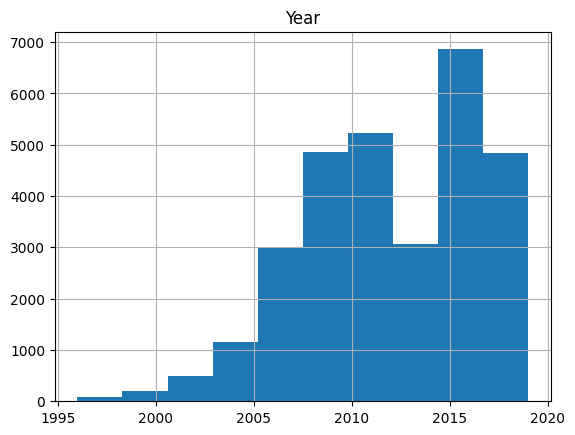

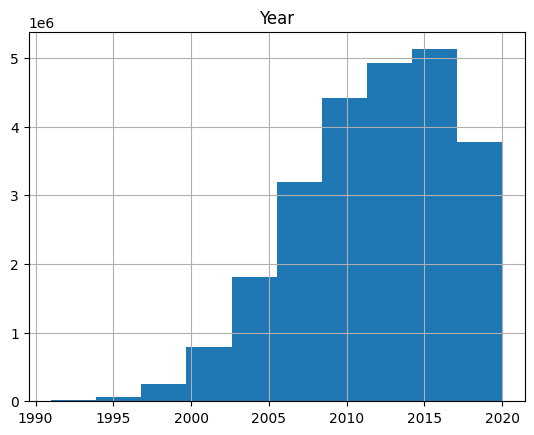

In [76]:
(df[df["Is Fraud?"] == 1]).hist(["Year"], bins=10)

In [2]:
dtype_conversions_preprocessed = {
    'User': 'uint16',
    'Card': 'uint8',
    'Year': 'uint16',
    'Month': 'uint8',
    'Day': 'uint8',
    # 'Time', -- dropped
    "Hour": "uint8",
    "Minute": "uint8",
    # 'Amount',
    # 'Use Chip': 'category', -- dropped
    # 'Merchant Name',
    # 'Merchant City': 'category', -- dropped
    # 'Merchant State': 'category', -- dropped
    # 'Zip', -- dropped
    'MCC': 'uint16',
    'Errors?': 'category',
    # 'Is Fraud?'
}

In [4]:
df = pd.read_csv("dataset_files/preprocessed_transactions.csv", dtype=dtype_conversions_preprocessed)

In [6]:
df.groupby(["Year", "Is Fraud?"]).count()["User"].unstack()

Is Fraud?,False,True
Year,,
2015,209073,2777
2016,210541,3073


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425464 entries, 0 to 425463
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   User           425464 non-null  uint16  
 1   Card           425464 non-null  uint8   
 2   Year           425464 non-null  uint16  
 3   Month          425464 non-null  uint8   
 4   Day            425464 non-null  uint8   
 5   Amount         425464 non-null  int64   
 6   Merchant Name  425464 non-null  int64   
 7   MCC            425464 non-null  uint16  
 8   Errors?        9920 non-null    category
 9   Is Fraud?      425464 non-null  bool    
 10  Hour           425464 non-null  uint8   
 11  Minute         425464 non-null  uint8   
dtypes: bool(1), category(1), int64(2), uint16(3), uint8(5)
memory usage: 11.8 MB
